In [ ]:
import numpy as np
import random
from matplotlib import pyplot as plt
import numpy.linalg as la

# Linear Regression
------------------
We are going to perform linear regression and fit a polynomial to a set of points

We consider a linear regression problem of the form
$$
y = \mathbf{x}^T θ +ϵ, \; ϵ \sim \mathcal{N}(0, σ^2)
$$
where $\mathbf{x}\in \mathcal{R}^D$ are inputs and $y \in \mathcal{R}$ are noisy observations.

We are interested in finding a good estimate of the parameters $\theta$

## The data
We will generate the data to work with

The data will be split into a training set and a test set

In [ ]:
# First we generate the data to work with
Ntrain = 20


In [ ]:
# generate N random sample points btw [-5, 5] uniformly
# generate the y's with an additive Gaussian noise
mu, sigma = 0, 0.2
eps = np.random.normal(mu, sigma, Ntrain).reshape(-1,1)

xtrain = np.random.uniform(-5, 5, size=(1, Ntrain)).reshape(-1,1)
ytrain = - np.sin(xtrain/5) + np.cos(xtrain) + eps


Text(0.5, 1.0, 'training data')

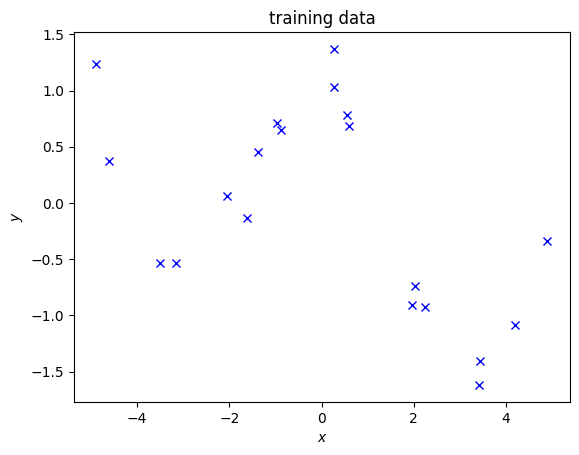

In [ ]:
# plot the training data
plt.figure()
plt.plot(xtrain, ytrain, 'xb')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("training data")

# 1. Maximum likelihood estimate
From the lecture we know that the ML estilmator for $θ$ is given by
$$
θ_{ML} = (X^TX)^{-1}X^T y
$$
where $X \in \mathcal{R}^{N×D}$ and $y \in \mathcal{R}^N$.


In [ ]:
## EDIT THIS FUNCTION
def max_likelihood_estimate(X,y):
    # X : N x D matrix of training inputs
    # y: N x 1 vector of training targets
    # returns: maximum likelihhod estimated parameters (D x 1)
    XT=np.transpose(X)
    theta_ml = la.inv(XT@X)@XT@y #we apply the formula

    return theta_ml

Before we can test our function we need to decide which polynomial we want to fit.

Let's try a linear function, that is $M=1$
$$
f(x_i) = θ_0 + θ_1 x_i
$$

In [ ]:
# Define the matrix X
# We need the define the data matrix X of size N X 2 (we addd a column of 1)

def make_data_matrix(x):
  # x : N x 1 input vetcor
  # returns data matrix XX of size N x 2
  X = np.concatenate((np.ones(x.shape),x),axis=1)

  return X

In [ ]:
# Apply the functions and estimate the parameters of the model
XX_train = make_data_matrix(xtrain)
theta_ml = max_likelihood_estimate(XX_train, ytrain)
print("estimated parameters :\n", theta_ml)

estimated parameters :
 [[-0.03678339]
 [-0.16843965]]


Now let's make prediction with our estimation

In [ ]:
## ## EDIT THIS FUNCTION
def predict_with_estimate(Xtest, theta):

  # Xtest : K x D matrix of test inputs
  # theta: D x 1 vector of parameters
  # returns: prediction of f(Xtest): K x 1 vector

  # to be completed

    prediction = Xtest@theta

    return prediction

In [ ]:
# predict the function values at test points using the ML estimator
# first let's define test points
xtest = np.linspace(-6, 6, 100).reshape(-1,1) # generate 100 points uniformly spaced
ytest = - np.sin(xtest/5) + np.cos(xtest) + np.random.normal(mu, sigma, 100).reshape(-1,1)

XX_test = make_data_matrix(xtest)
ml_pred = predict_with_estimate(XX_test, theta_ml)

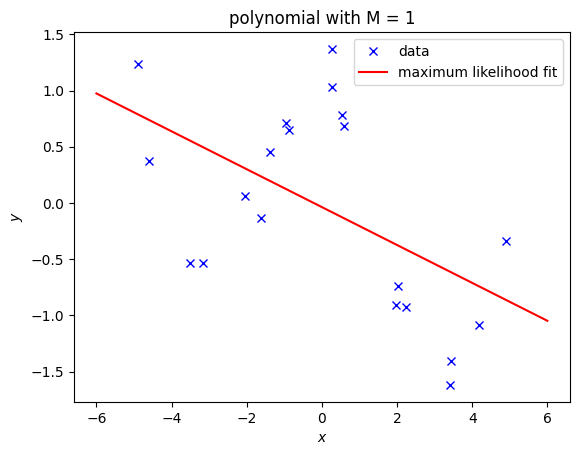

In [ ]:
# plot the test data and the estimated polynomial
plt.figure
plt.plot(xtrain, ytrain, 'xb')
plt.plot(xtest, ml_pred, '-r')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("polynomial with M = 1")
plt.legend(["data", "maximum likelihood fit"])

## Question
What can you say about this polynomial fit?

ANS:

We can notice that this **polynomial degree** does not fit all the points which may cause the underfittng of our model

# Polynomial Regression

One class of functions that is covered by linear regression is the family of polynomials because we can write a polynomial of degree K
as
$$
\sum_{k=0}^K \theta_k x^k = \phi(x)^T θ, \qquad \phi(x) = \begin{bmatrix} x^0 \\ x^1 \\ \vdots \\x^K \end{bmatrix}
$$
Here, ϕ(x) is a nonlinear feature transformation of the inputs x∈ℝ.

Let us start by computing the feature matrix $\Phi = [\phi(x_1), \ldots, \phi(x_n)]^T \in \mathcal{R}^{N × K+1}$

In [ ]:
## EDIT THIS FUNCTION
def poly_features(X, K):

    # X: inputs of size N x 1
    # K: degree of the polynomial
    # returns the feature matrix Phi (N x (K+1))

    X = X.flatten()
    N = X.shape[0]

    #initialize Phi
    Phi = np.zeros((N, K+1))

    # Compute the feature matrix in stages
    ## <--- EDIT THIS LINE
    for i in range(K+1) :
      for j in range(len(X)):
        Phi[j][i]=pow(X[j],i)
    return Phi

With this feature matrix we get the maximum likelihood estimator as
$$
θ_{ML} = (Φ^T Φ)^{-1}Φ^T y
$$
For reasons of numerical stability, we often add a small diagonal "jitter" $κ >0$ to $Φ^TΦ$ so that we can invert the matrix without significant problems, and so the maximum likelihood estimate becomes
$$
θ_{ML} = (Φ^T Φ + κ I)^{-1}Φ^T y
$$

In [ ]:
## EDIT THIS FUNCTION
def nonlinear_features_maximum_likelihood(Phi, y):
    # Phi: features matrix for training inputs. Size of N x D
    # y: training targets. Size of N by 1
    # returns: maximum likelihood estimator theta_ml. Size of D x 1

    kappa = 1e-08 # 'jitter' term; good for numerical stability

    D = Phi.shape[1]

    # maximum likelihood estimat
    theta_ml = la.inv(Phi.T@Phi+kappa*np.identity(D))@Phi.T@y

    return theta_ml

(20, 4)


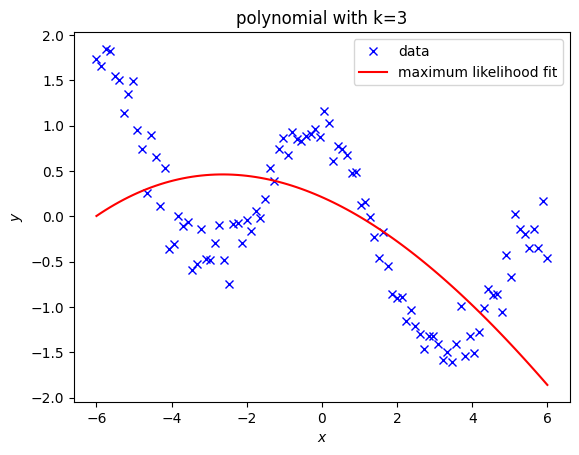

In [ ]:
# test
K = 3
# find best estimate of parameters
## <--- EDIT THIS LINE
Phi = poly_features(xtrain, K)
print(Phi.shape)
theta_ml=nonlinear_features_maximum_likelihood(Phi, ytrain)

# Apply to test data
## <--- EDIT THIS LINE
ml_pred=predict_with_estimate(poly_features(xtest,K), theta_ml)
# plot
plt.figure
plt.plot(xtest, ytest, 'xb')
plt.plot(xtest, ml_pred, '-r')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("polynomial with k=3")
plt.legend(["data", "maximum likelihood fit"])

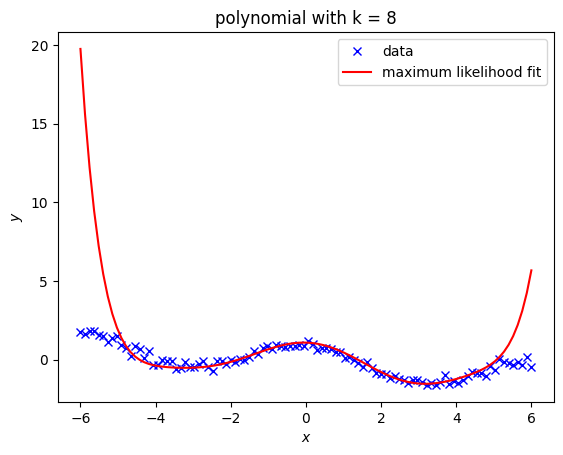

In [ ]:
# test
K = 8
# find best estimate of parameters
Phi = poly_features(xtrain, K)
theta_ml=nonlinear_features_maximum_likelihood(Phi, ytrain)
# Apply to test data
ml_pred=predict_with_estimate(poly_features(xtest,K), theta_ml)
# plot
plt.figure
plt.plot(xtest, ytest, 'xb')
plt.plot(xtest, ml_pred, '-r')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("polynomial with k = 8")
plt.legend(["data", "maximum likelihood fit"])

# Quality of prediction
1. try out different degrees of polynomials
2. Which one looks the best?
**ANS:**
After trying many different values of polynomials degree, We can deduce that increasing the degree of the polynomial, the model fit correctly to train data set but at the very high degree of polynomial, the model is not able to fit correctly all the point (it may overfit)  



Let's be more systematic in assessing the quality of the fit.
For this we will use the root-mean-squared-error (RMSE) between the $y$-values predicted and the ground truth $y$ values:
$$
RMSE = \sqrt{\frac{1}{N}\sum_{n=1}^N (y_n - y_n^{pred})^2}
$$

Write a function that computes the RMSE

In [ ]:
def RMSE(y, ypred):
  rmse = np.sqrt(np.mean((y-ypred)**2)) #Root-mean-squared-error (RMSE) between the  y -values and y -pred
  return rmse

Now compute the RMSE for different degrees of the polynomial

Text(0.5, 1.0, 'RMSE train')

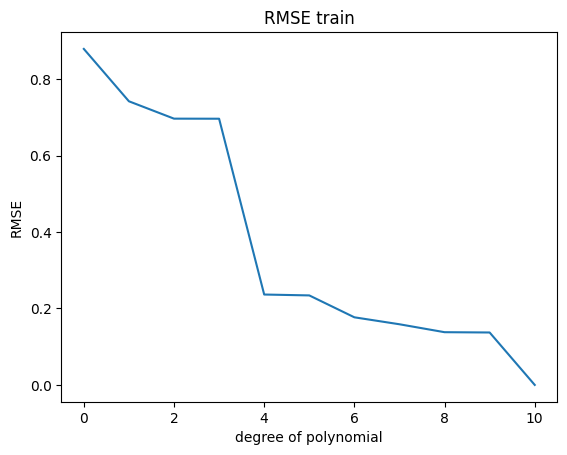

In [ ]:
K_max = 10
rmse_train = np.zeros((K_max+1))

for k in range(K_max):
  #calculating the Phi matrix
  Phi = poly_features(xtrain, k)
  #Calculating the parameters
  theta_ml=nonlinear_features_maximum_likelihood(Phi, ytrain)
  #Calculating the predected value
  ypred=Phi@theta_ml
  #Calculating the ROOT mean square
  rmse_train[k] =RMSE(ytrain, ypred)


#plot
plt.figure()
plt.plot(rmse_train) #plotting the RMSE
plt.xlabel("degree of polynomial")
plt.ylabel("RMSE")
plt.title("RMSE train")

## Questions
1. What do you observe?
**ANS:**
We can notice that increasing the degree of polynomial will decrease the error and the model fit correctly the data
2. What is the best polynomial fit according to the plot?
**ANS:**
According to the plot ,the best polynomial degree is the one that correspond to the minimum RMSE which is K=10.
3. Write some code that plots the function using the best polynomial degree (use the test set here). What do you observe now?
**ANS:**
After plotting the grap, we can notice that the model between -4 and 4 fit the data correctly .However , before and after this range the model is not able to predict correctly .
we can conclude that , choosing k is based on both :the perfomance of the model on the trainset and the testset in order to generalize the model  .   

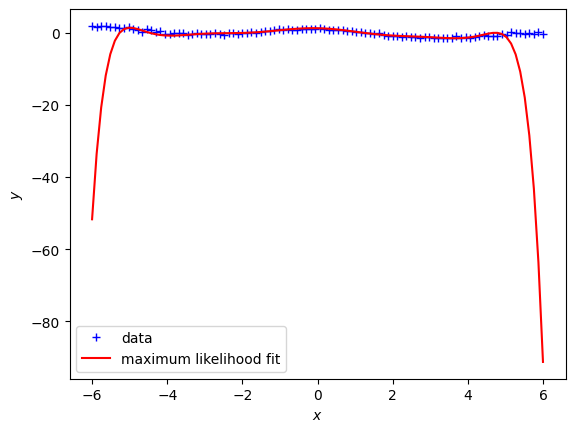

In [ ]:
##THE PLOTTING
# estimate the parameters with the best polynomial fit
k_best = 10 #we choose k that correspond to the minimum RMSE
# Apply to test data
  # feature matrix for train inputs
Phi = poly_features(xtrain, k_best)
# feature matrix for test inputs
Phi_test = poly_features(xtest, k_best)
#Maximum likelihood estimate
theta_ml=nonlinear_features_maximum_likelihood(Phi, ytrain)
# predict y-values of test set
ypred_test=Phi_test@theta_ml

#PLOTTING
plt.figure()
plt.plot(xtest, ytest, '+b')
plt.plot(xtest, ypred_test, '-r')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend(["data", "maximum likelihood fit"])

The RMSE on the training data is somewhat misleading, because we are interested in the generalization performance of the model. Therefore, we are going to compute the RMSE on the test set and use this to choose a good polynomial degree.

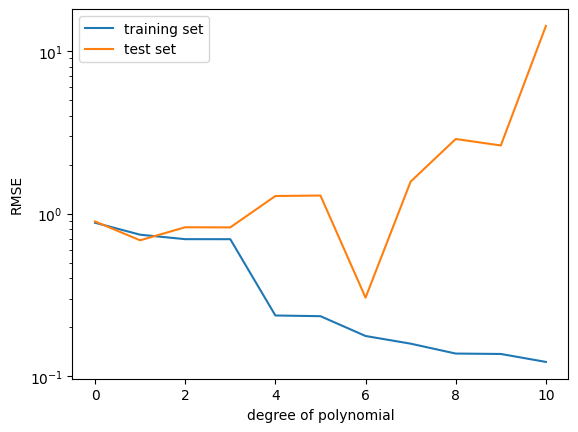

In [ ]:
## EDIT THIS CELL
K_max = 10
rmse_train = np.zeros((K_max+1,))
rmse_test = np.zeros((K_max+1,))

for k in range(K_max+1):

    # feature matrix
    Phi = poly_features(xtrain, k)

    # maximum likelihood estimate
    theta_ml = nonlinear_features_maximum_likelihood(Phi, ytrain)

    # predict y-values of training set
    ypred_train = predict_with_estimate(Phi,theta_ml)

    # RMSE on training set
    rmse_train[k] = RMSE(ytrain, ypred_train)
    # feature matrix for test inputs
    Phi_test = poly_features(xtest, k)

    # prediction (test set)
    ypred_test = predict_with_estimate(Phi_test,theta_ml)

    # RMSE on test set
    rmse_test[k] = RMSE(ytest, ypred_test)


plt.figure()
plt.semilogy(rmse_train) # this plots the RMSE on a logarithmic scale
plt.semilogy(rmse_test) # this plots the RMSE on a logarithmic scale
plt.xlabel("degree of polynomial")
plt.ylabel("RMSE")
plt.legend(["training set", "test set"]);



## Questions:
1. What do you observe now?
**ANS:**
Changing the degree of the polynomial will effect the RMSE of the train and test set differently .
2. Why does the RMSE for the test set not always go down?
**ANS:**
The RMSE of the test does not always go down because the model did not use this data for training and tunning the parameters (new data) and this may cause the overfitting of the model(RMSE will go up) in case k is too big .
3. Which polynomial degree would you choose now?
**ANS:**
We choose the polynomial of degree K=6 which correspond to the minimum gap between the RMSE of the train and RMSE of the test set (we try to get a low variance and low bias )  
4. Plot the fit for the "best" polynomial degree.



the RMSE of the train set is : 0.14324559839360387
the RMSE of the test set is : 0.325550383399364


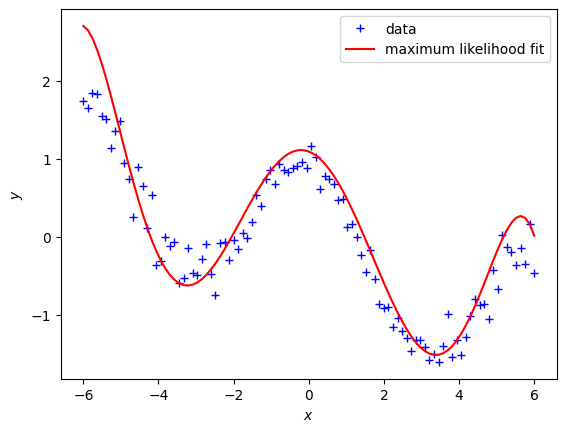

In [ ]:
## WRITE THE PLOTTING CODE HERE
k_best = 6
# Apply to test data
# feature matrix
Phi = poly_features(xtrain, k_best)
# maximum likelihood estimate
theta_ml = nonlinear_features_maximum_likelihood(Phi, ytrain)
# predict y-values of training set
ypred_train = predict_with_estimate(Phi,theta_ml)
print(f'the RMSE of the train set is : {RMSE(ytrain, ypred_train)}')
# feature matrix for test inputs
Phi_test = poly_features(xtest, k_best)
# prediction (test set)
ypred_test = predict_with_estimate(Phi_test,theta_ml)
# RMSE on test set
print(f'the RMSE of the test set is : {RMSE(ytest, ypred_test)}')

# plot
plt.figure()
plt.plot(xtest, ytest, '+b')
plt.plot(xtest, ypred_test, '-r')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend(["data", "maximum likelihood fit"])

##Question
If you did not have a designated test set, what could you do to estimate the generalization error (purely using the training set)?

**ANS:**
In case we do not have the test set ,we can create a validation set by deviding the train set into two part : train and validation , we use the trainset to train the model and we use the validation to see if our model is able to generalize to the unseen data .

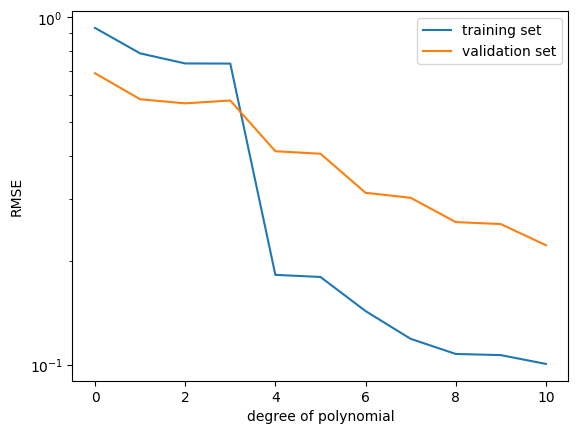

In [ ]:
#Splitting the data
N=20
k=5
#Vallidation set
x_val=xtrain[0:k]
y_val=ytrain[0:k]
#Train set
xtrain=xtrain[k:]
ytrain=ytrain[k:]

#Finfing the best k
K_max = 10
rmse_train = np.zeros((K_max+1,))
rmse_val = np.zeros((K_max+1,))

for k in range(K_max+1):

    # feature matrix
    Phi = poly_features(xtrain, k)

    # maximum likelihood estimate
    theta_ml = nonlinear_features_maximum_likelihood(Phi, ytrain)

    # predict y-values of training set
    ypred_train = predict_with_estimate(Phi,theta_ml)


    # RMSE on training set
    rmse_train[k] = RMSE(ytrain, ypred_train)
    # feature matrix for validation set
    Phi_val = poly_features(x_val, k)

    # prediction (test set)
    ypred_val = predict_with_estimate(Phi_val,theta_ml)

    # RMSE on validation set
    rmse_val[k] = RMSE(y_val, ypred_val)


plt.figure()
plt.semilogy(rmse_train) # this plots the RMSE on a logarithmic scale
plt.semilogy(rmse_val) # this plots the RMSE on a logarithmic scale
plt.xlabel("degree of polynomial")
plt.ylabel("RMSE")
plt.legend(["training set", "validation set"]);
